### Task_1:

Добиться вразумительного результата от модели, собранной на занятии (3
угаданные картинки из 4 предложенных на семинаре). Варианты изменений:
- a. изменение слоёв и их количества;
- b. изменение метода оптимизации;
- c. изменение процесса обучения;
- d. для продвинутых: преобразование данных.


In [35]:
import torch
import torchvision

from torch import nn 
from torch import optim

import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [58]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,
                                             download=False,
                                             transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=50, 
                                           shuffle=True)

In [59]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                            train=False,
                                            download=False,
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100,
                                          shuffle=False)

In [4]:
image, label = train_dataset[57]
print (image.size())
print (label)

torch.Size([3, 32, 32])
2


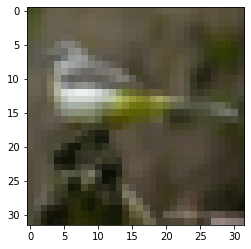

In [5]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [6]:
classes = train_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

##### Определение модели:

In [7]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to('cpu')

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [9]:
def get_test_loss():
    return round(float(criterion(net(list(test_loader)[2][0]), list(test_loader)[2][1])), 3)

In [10]:
train_losses = []
test_losses = []

for epoch in range(25):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
#         if i % 300 == 0:    # печатаем каждые 300 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
    train_losses.append(running_loss)
    test_losses.append(get_test_loss())
    print(f'epoch {epoch}, train_loss: {round(running_loss, 2)}, test_loss: {test_losses[-1]}')

print('Training is finished!')

epoch 0, train_loss: 2303.32, test_loss: 2.299
epoch 1, train_loss: 2300.49, test_loss: 2.294
epoch 2, train_loss: 2297.04, test_loss: 2.287
epoch 3, train_loss: 2291.85, test_loss: 2.274
epoch 4, train_loss: 2283.13, test_loss: 2.258
epoch 5, train_loss: 2268.92, test_loss: 2.232
epoch 6, train_loss: 2239.28, test_loss: 2.188
epoch 7, train_loss: 2177.73, test_loss: 2.103
epoch 8, train_loss: 2092.73, test_loss: 2.03
epoch 9, train_loss: 2027.25, test_loss: 1.985
epoch 10, train_loss: 1996.09, test_loss: 1.97
epoch 11, train_loss: 1976.65, test_loss: 1.959
epoch 12, train_loss: 1959.59, test_loss: 1.946
epoch 13, train_loss: 1941.49, test_loss: 1.921
epoch 14, train_loss: 1921.22, test_loss: 1.919
epoch 15, train_loss: 1897.64, test_loss: 1.898
epoch 16, train_loss: 1873.34, test_loss: 1.889
epoch 17, train_loss: 1847.64, test_loss: 1.871
epoch 18, train_loss: 1820.81, test_loss: 1.849
epoch 19, train_loss: 1792.79, test_loss: 1.828
epoch 20, train_loss: 1765.2, test_loss: 1.789
epoch

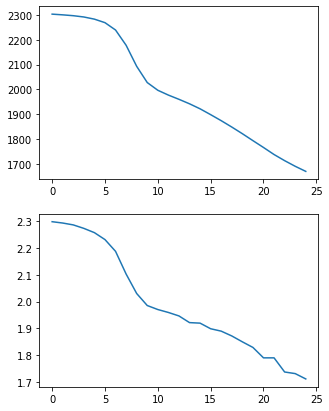

In [18]:
plt.figure(figsize=(5,7))

plt.subplot(2, 1, 1)
plt.plot(train_losses)

plt.subplot(2, 1, 2)
plt.plot(test_losses)

Все хорошо, переобучения нет, темпы обучения хорошие, запустим процесс ещё раз с той же точки.

In [21]:
train_losses = []
test_losses = []

for epoch in range(25):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
#         if i % 300 == 0:    # печатаем каждые 300 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
    train_losses.append(running_loss)
    test_losses.append(get_test_loss())
    print(f'epoch {epoch}, train_loss: {round(running_loss, 2)}, test_loss: {test_losses[-1]}')

print('Training is finished!')

epoch 0, train_loss: 1650.86, test_loss: 1.655
epoch 1, train_loss: 1634.92, test_loss: 1.638
epoch 2, train_loss: 1620.74, test_loss: 1.649
epoch 3, train_loss: 1608.92, test_loss: 1.627
epoch 4, train_loss: 1596.84, test_loss: 1.612
epoch 5, train_loss: 1586.0, test_loss: 1.564
epoch 6, train_loss: 1575.9, test_loss: 1.594
epoch 7, train_loss: 1564.73, test_loss: 1.603
epoch 8, train_loss: 1554.28, test_loss: 1.574
epoch 9, train_loss: 1545.35, test_loss: 1.564
epoch 10, train_loss: 1537.95, test_loss: 1.574
epoch 11, train_loss: 1528.36, test_loss: 1.56
epoch 12, train_loss: 1520.86, test_loss: 1.573
epoch 13, train_loss: 1512.38, test_loss: 1.563
epoch 14, train_loss: 1505.68, test_loss: 1.551
epoch 15, train_loss: 1498.88, test_loss: 1.544
epoch 16, train_loss: 1492.26, test_loss: 1.538
epoch 17, train_loss: 1486.25, test_loss: 1.537
epoch 18, train_loss: 1478.84, test_loss: 1.529
epoch 19, train_loss: 1473.52, test_loss: 1.517
epoch 20, train_loss: 1467.87, test_loss: 1.52
epoch 

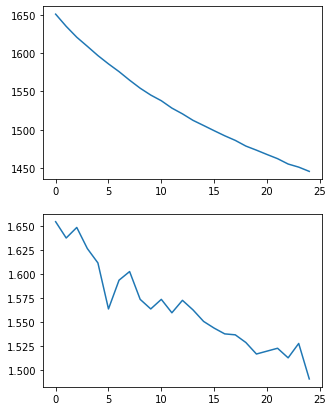

In [24]:
plt.figure(figsize=(5,7))

plt.subplot(2, 1, 1)
plt.plot(train_losses)

plt.subplot(2, 1, 2)
plt.plot(test_losses)

Уже тестовая кривая обучения ведет себя немного по-другому - волатильней и угол наклона меняется, но потенциал, кажется, ещё есть некоторый.

In [37]:
# Доля верно спредикченных лейблов.
def get_true_labels_rate():
    preds = list(torch.max(net(list(test_loader)[2][0]), 1)[1])
    trues = list(test_loader)[2][1]
    
    matches = torch.FloatTensor([(1 if preds[i] == trues[i] else 0) for i in range(len(preds))])
    
    return matches.mean()
    
get_true_labels_rate()

tensor(0.4600)

In [43]:
train_losses = []
test_losses = []

for epoch in range(25):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
#         if i % 300 == 0:    # печатаем каждые 300 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
    train_losses.append(running_loss)
    test_losses.append(get_test_loss())
    print(f'epoch {epoch}, train_loss: {round(running_loss, 2)}, test_loss: {test_losses[-1]}')

print('Training is finished!')

epoch 0, train_loss: 1439.59, test_loss: 1.536
epoch 1, train_loss: 1433.63, test_loss: 1.487
epoch 2, train_loss: 1429.42, test_loss: 1.521
epoch 3, train_loss: 1423.78, test_loss: 1.49
epoch 4, train_loss: 1420.17, test_loss: 1.475
epoch 5, train_loss: 1413.2, test_loss: 1.473
epoch 6, train_loss: 1408.49, test_loss: 1.523
epoch 7, train_loss: 1405.03, test_loss: 1.472
epoch 8, train_loss: 1400.17, test_loss: 1.467
epoch 9, train_loss: 1395.57, test_loss: 1.477
epoch 10, train_loss: 1391.06, test_loss: 1.472
epoch 11, train_loss: 1388.05, test_loss: 1.478
epoch 12, train_loss: 1381.16, test_loss: 1.47
epoch 13, train_loss: 1377.86, test_loss: 1.444
epoch 14, train_loss: 1371.94, test_loss: 1.448
epoch 15, train_loss: 1369.64, test_loss: 1.424
epoch 16, train_loss: 1363.4, test_loss: 1.485
epoch 17, train_loss: 1359.98, test_loss: 1.446
epoch 18, train_loss: 1355.92, test_loss: 1.421
epoch 19, train_loss: 1351.98, test_loss: 1.383
epoch 20, train_loss: 1346.69, test_loss: 1.451
epoch 

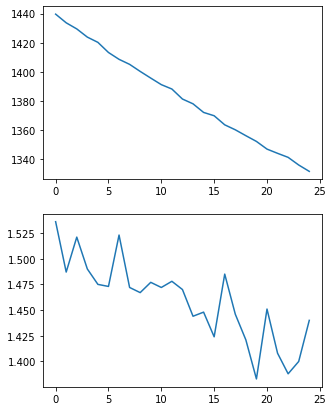

In [45]:
plt.figure(figsize=(5,7))

plt.subplot(2, 1, 1)
plt.plot(train_losses)

plt.subplot(2, 1, 2)
plt.plot(test_losses)

In [44]:
get_true_labels_rate()

tensor(0.4900)

Доля верно угаданных приросла ещё на 3%, кривая обучения на тестовых данных показывала на прошедшем 25-итерационном цикле совсем другой наклон и волатильность, но тренд ещё прослеживается, ещё разок прогоним 25 эпох.

In [51]:
train_losses = []
test_losses = []

for epoch in range(25):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
#         if i % 300 == 0:    # печатаем каждые 300 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
    train_losses.append(running_loss)
    test_losses.append(get_test_loss())
    print(f'epoch {epoch}, train_loss: {round(running_loss, 2)}, test_loss: {test_losses[-1]}')

print('Training is finished!')

epoch 0, train_loss: 1328.78, test_loss: 1.395
epoch 1, train_loss: 1324.24, test_loss: 1.362
epoch 2, train_loss: 1320.8, test_loss: 1.353
epoch 3, train_loss: 1316.28, test_loss: 1.4
epoch 4, train_loss: 1313.66, test_loss: 1.38
epoch 5, train_loss: 1309.35, test_loss: 1.345
epoch 6, train_loss: 1305.55, test_loss: 1.356
epoch 7, train_loss: 1302.68, test_loss: 1.327
epoch 8, train_loss: 1296.75, test_loss: 1.37
epoch 9, train_loss: 1293.7, test_loss: 1.311
epoch 10, train_loss: 1291.8, test_loss: 1.331
epoch 11, train_loss: 1288.78, test_loss: 1.327
epoch 12, train_loss: 1283.38, test_loss: 1.345
epoch 13, train_loss: 1280.7, test_loss: 1.311
epoch 14, train_loss: 1274.96, test_loss: 1.331
epoch 15, train_loss: 1274.74, test_loss: 1.303
epoch 16, train_loss: 1269.92, test_loss: 1.323
epoch 17, train_loss: 1268.33, test_loss: 1.321
epoch 18, train_loss: 1264.09, test_loss: 1.366
epoch 19, train_loss: 1261.0, test_loss: 1.3
epoch 20, train_loss: 1258.87, test_loss: 1.28
epoch 21, trai

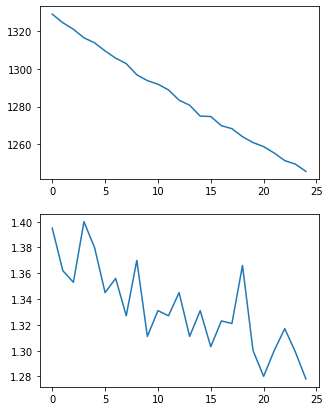

In [52]:
plt.figure(figsize=(5,7))

plt.subplot(2, 1, 1)
plt.plot(train_losses)


plt.subplot(2, 1, 2)
plt.plot(test_losses)

In [53]:
get_true_labels_rate()

tensor(0.5300)

Пойду на турники, пусть ещё пообучается немного.

In [60]:
train_losses = []
test_losses = []

for epoch in range(175):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
#         if i % 300 == 0:    # печатаем каждые 300 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
    train_losses.append(running_loss)
    test_losses.append(get_test_loss())
    print(f'epoch {epoch}, train_loss: {round(running_loss, 2)}, test_loss: {test_losses[-1]}')

print('Training is finished!')

epoch 0, train_loss: 1240.65, test_loss: 1.283
epoch 1, train_loss: 1238.45, test_loss: 1.3
epoch 2, train_loss: 1233.37, test_loss: 1.282
epoch 3, train_loss: 1233.42, test_loss: 1.282
epoch 4, train_loss: 1229.9, test_loss: 1.286
epoch 5, train_loss: 1226.78, test_loss: 1.268
epoch 6, train_loss: 1224.12, test_loss: 1.311
epoch 7, train_loss: 1221.24, test_loss: 1.257
epoch 8, train_loss: 1217.81, test_loss: 1.253
epoch 9, train_loss: 1215.36, test_loss: 1.262
epoch 10, train_loss: 1212.84, test_loss: 1.316
epoch 11, train_loss: 1210.41, test_loss: 1.273
epoch 12, train_loss: 1208.62, test_loss: 1.238
epoch 13, train_loss: 1204.02, test_loss: 1.295
epoch 14, train_loss: 1202.07, test_loss: 1.332
epoch 15, train_loss: 1200.59, test_loss: 1.236
epoch 16, train_loss: 1197.36, test_loss: 1.247
epoch 17, train_loss: 1195.02, test_loss: 1.255
epoch 18, train_loss: 1193.81, test_loss: 1.262
epoch 19, train_loss: 1189.8, test_loss: 1.273
epoch 20, train_loss: 1186.49, test_loss: 1.262
epoch 

KeyboardInterrupt: 

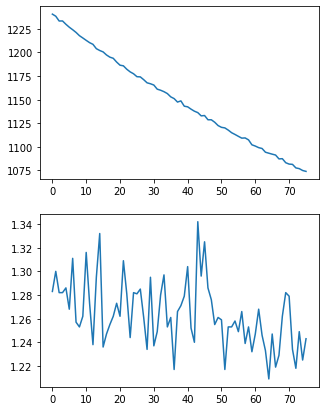

In [61]:
plt.figure(figsize=(5,7))

plt.subplot(2, 1, 1)
plt.plot(train_losses)

plt.subplot(2, 1, 2)
plt.plot(test_losses)

In [62]:
get_true_labels_rate()

tensor(0.5600)

##### Оценка модели:

In [67]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

images = images[10:14]; labels = labels[10:14]

GroundTruth:  airplane truck   dog horse


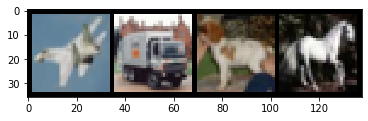

In [68]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [69]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  airplane truck   dog horse


##### Комментарии и выводы:

Что сделал:
* Увеличил кол-во эпох потому что модель показывала высокие темы обучения на 10-й эпохе.
* Убрал один из полносвязных слоев для уменьшения возможного переобучения.
* Самое важное, кажется - уменьшил learning rate в оптимизаторе, потому что, кажется, именно он влиял на то, что при обучении не менялась ошибка, похоже, из-за слишком большого шага при оптимизации обучение попадало в локальный минимум функции ошибки и застревало в нем.

### Task_2:

Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме,
как обучали модель в конце занятия.

### Task_3:

Переписать программу на PyTorch

Надо запускать и дебажить - не запускал, но как-то так это могло бы выглядеть.

In [71]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(p=0.2)
        self.linear_2 = nn.Linear(10, 10)

    def forward(self, x):
        x = F.relu(self.linear_1(x))
        x = self.dropout(x)
        x = F.softmax(self.linear_2(x))
        return x


net = Net().to('cpu')